# Demo HRV module

authors:
License:

Demo that shows how to use the HRV class to perform a complete HRV analysis.

It is assumed the following:
 * You have available two numpy array  vectors: 
  1. RR interval vector.
  2. Label vector.
 
We provided a real 5-min example in .npy format. We are currently working on a python class to read differente Holter formats.

Let's begin

## 1. Load RR inteval and labels

First step is to load the RR inteval. The example we provided is in .npy format

[645. 692. 687. 668. 685.]
['N' 'N' 'N' 'N' 'N']


<IPython.core.display.Javascript object>


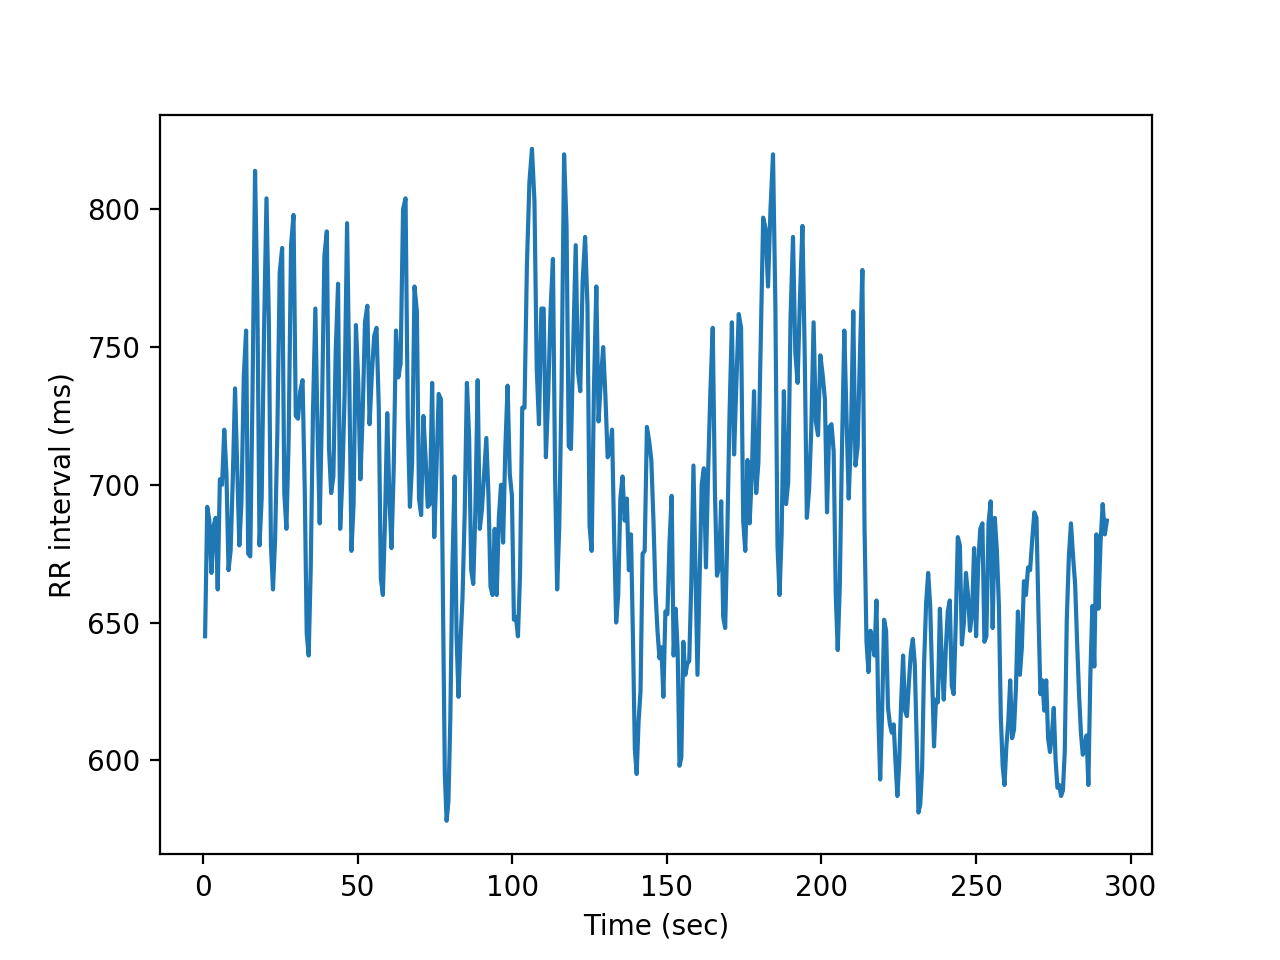

Text(0,0.5,'RR interval (ms)')

In [8]:
#load needed modules
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

#load data
rr = np.load('rr_examples.npy')
labels = np.load('labels_example.npy')

#print first samples of the example
print(rr[0:5])
print(labels[0:5])

#We plot the rr interval time series.
#We can build a time vector using the rr itself
t = np.cumsum(rr)/1000 #time in secs

plt.plot(t,rr)
plt.xlabel('Time (sec)')
plt.ylabel('RR interval (ms)')

## 2. HRV Preprocessing

The second step, once data is loaded, in HRV analysis is the preprocessing stage. In this step, we seek any non-sinusal beat or beats that, even labeled as Normal, are non physiological. We, next, remove those beats and interpolating them to obtain a reliabel NN-interval time series.

<IPython.core.display.Javascript object>


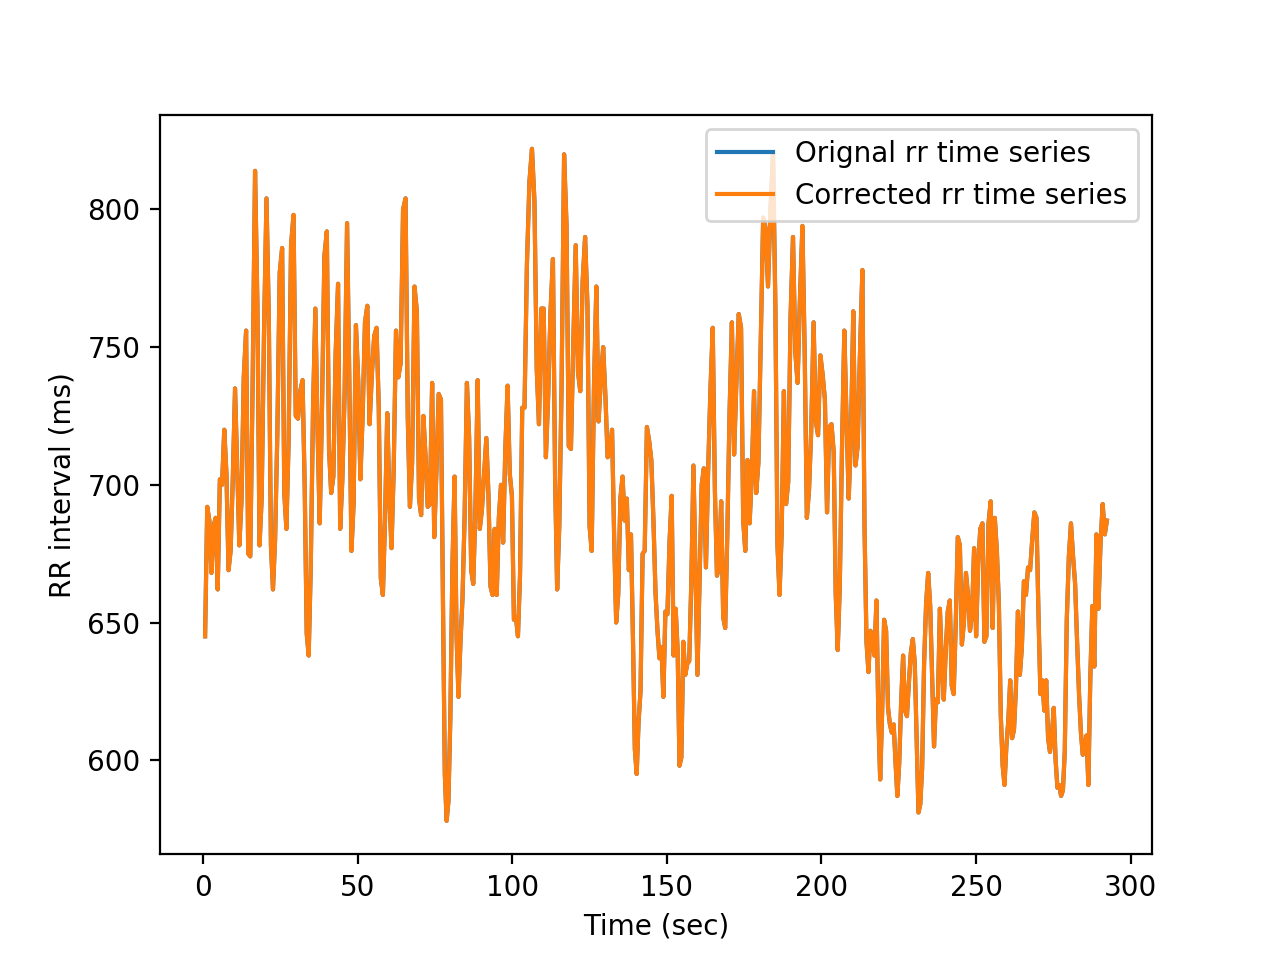

In [2]:
# we create an object of the class HRV

from HRV import *

my_hrv = HRV()

#we establish a threshold of 20%, i.e., we allow no more than 20% of the beats labeled as non-N
prct = 0.2

# 1. Detection of non-normal beats, they could be Ventricular or supraventricular ectopics or artifacs
ind_not_N_beats=my_hrv.artifact_ectopic_detection(rr, labels, prct, numBeatsAfterV = 4)

valid = my_hrv.is_valid(ind_not_N_beats,perct_valid = 0.2)

#2. Correction
#if every beat is Normal (sum(ind_not_N_beats) == 0), then no correction
if ind_not_N_beats.sum() > 0:
    rr_corrected = hrv_anal.artifact_ectopic_correction(rr, ind_not_N_beats, method='linear')
else:
    rr_corrected = rr.copy()
    
#rr_corrected is the working rr interval-time seris vector.

#We check that both vectors are the same, since, in this case, there is no need for correction
plt.figure()
plt.plot(t,rr)
plt.plot(t,rr_corrected)
plt.xlabel('Time (sec)')
plt.ylabel('RR interval (ms)')
plt.legend(['Orignal rr time series','Corrected rr time series'])


## 3. HRV assessment

Once the RR interval time series is preprocessed, we can start to obtain the HRV indices that allows to characterized HRV status of the subject.

Currently, we have implemented Time-Domain indices, both statistical and geometrical, and Frequency-Domain indices.

In [9]:
#HRV analysis - Time Domain

#1. Time-domain: Statistical
avnn = my_hrv.avnn(rr)
nn50 = my_hrv.nn50(rr)
pnn50 = my_hrv.pnn50(rr)
rmssd = my_hrv.rmssd(rr)
sdann = my_hrv.sdann(rr)
sdnn = my_hrv.sdnn(rr)
sdsd = my_hrv.sdsd(rr)
#NOTE: sdnn_index has only meaning in time series at least 2x5 mins length, so is usually obtain in 24 holter recordings.
#sdnn_idx = my_hrv.sdnnidx(rr)

#2. Time-domain: Geometric
hrv_triag_idx = my_hrv.hrvTriangIndex(rr)
log_idx = my_hrv.logIndex(rr)
sd1,sd2,cup,cdown = my_hrv.mediasPoincare(rr)
tinn = my_hrv.tinn(rr)


print("HRV Time Domain analysis - Statistic")

print('avnn = {0:.2f}'.format(avnn))
print('nn50 = {0:.2f}'.format(nn50))
print('rmssd = {0:.2f}'.format(rmssd))
print('pnn50 = {0:.2f}'.format(pnn50))
print('sdann = {0:.2f}'.format(sdann))
print('sdnn = {0:.2f}'.format(sdnn))
print('sdsd = {0:.2f}'.format(sdsd))
print("")
print("------------o--------------")
print("")
print("HRV Time Domain analysis - Geometric")
print('HRV triang. index = {0:.2f}'.format(hrv_triag_idx))
print('log_idx = {0:.2f}'.format(log_idx))
print('sd1 = {0:.2f}'.format(sd1))
print('sd2 = {0:.2f}'.format(sd2))
print('tinn = {0:.2f}'.format(tinn))

/Users/obarquero/anaconda/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/obarquero/anaconda/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/obarquero/anaconda/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


HRV Time Domain analysis - Statistic
avnn = 687.80
nn50 = 51.00
rmssd = 33.14
pnn50 = 12.03
sdann = nan
sdnn = 53.86
sdsd = 33.18

------------o--------------

HRV Time Domain analysis - Geometric
HRV triang. index = 14.66
log_idx = -0.02
sd1 = 23.43
sd2 = 72.45
tinn = 236.44


<IPython.core.display.Javascript object>


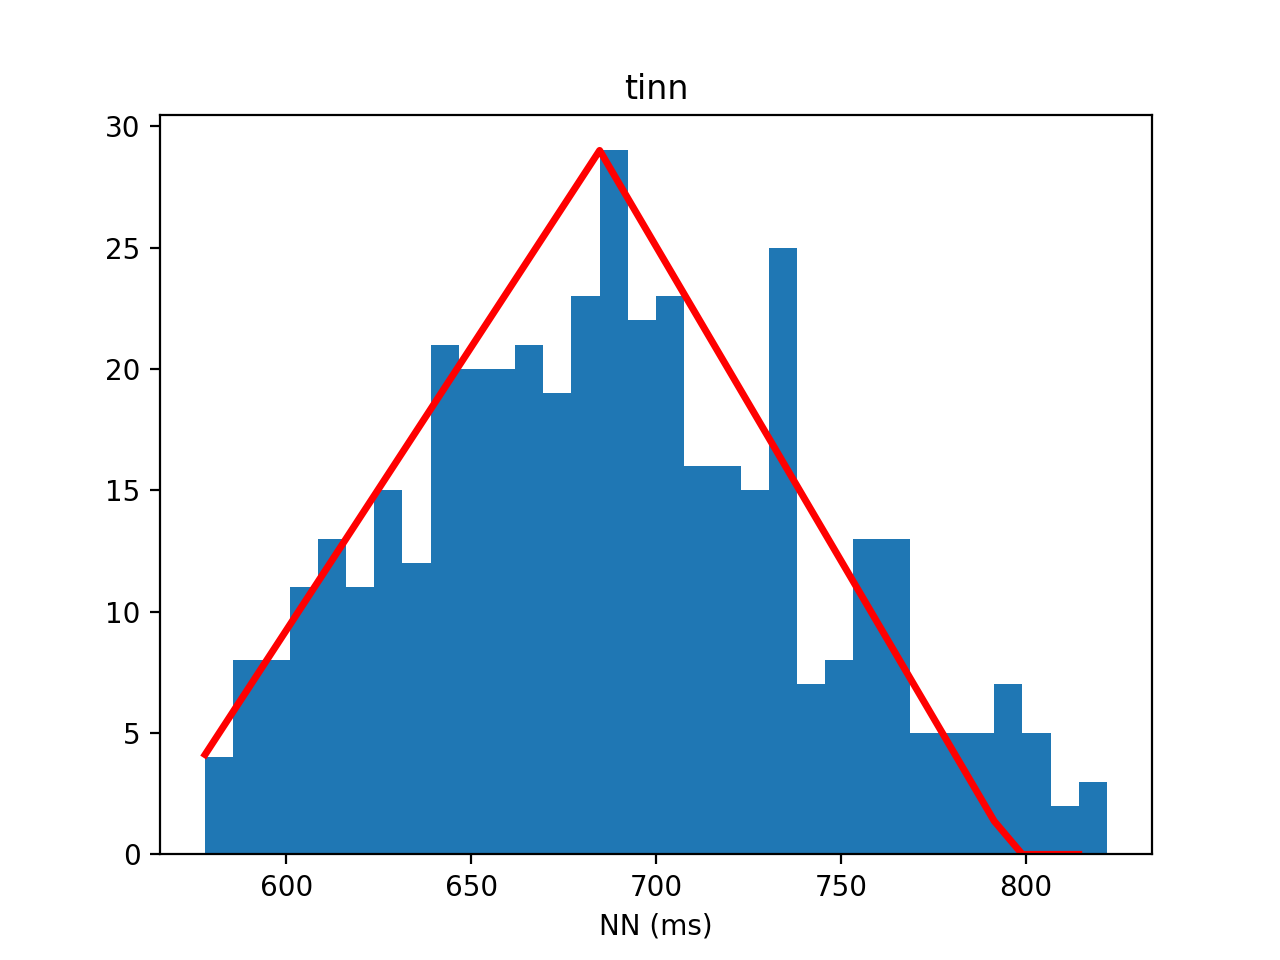

<IPython.core.display.Javascript object>


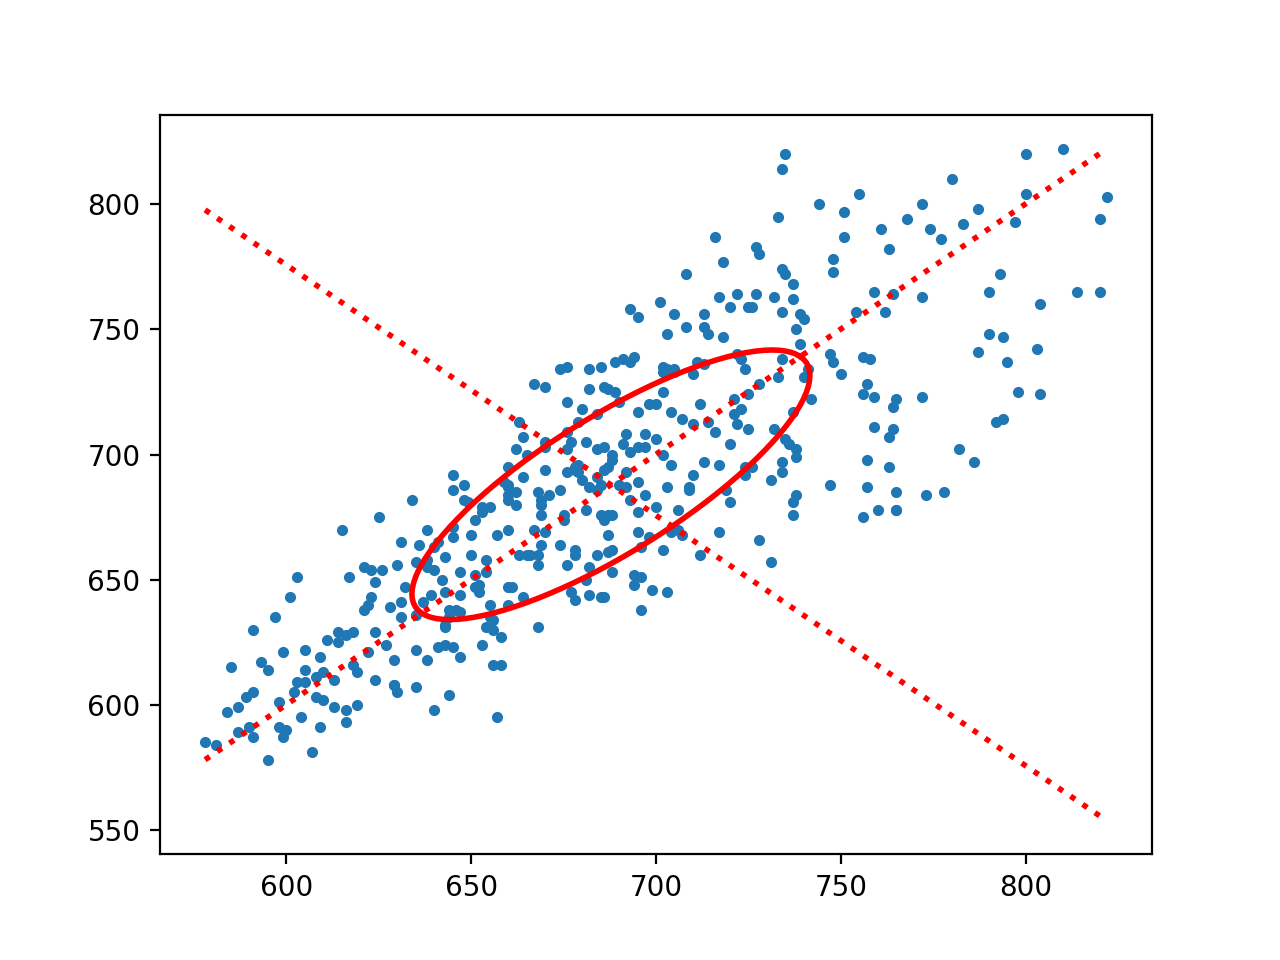

/Users/obarquero/Desktop/git_hub/PyCardio/HRV/HRV.py:673: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
/Users/obarquero/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/obarquero/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/Users/obarquero/Desktop/git_hub/PyCardio/HRV/HRV.py:675: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
/Users/obarquero/Desktop/git

(23.433563244787475,
 72.44960316123202,
 0.5543863868678974,
 0.44561361313210274)

In [10]:
#We can also plot some of the geometric indices

plt.figure()
my_hrv.tinn(rr,flag = True)

plt.figure()
my_hrv.mediasPoincare(rr,flag = True)

HRV Frequency Domain Analysis
Ptot = 1992.28
Pvlf = 788.50
Plf = 581.94
Phf = 621.83
lf/hf = 0.94


<IPython.core.display.Javascript object>


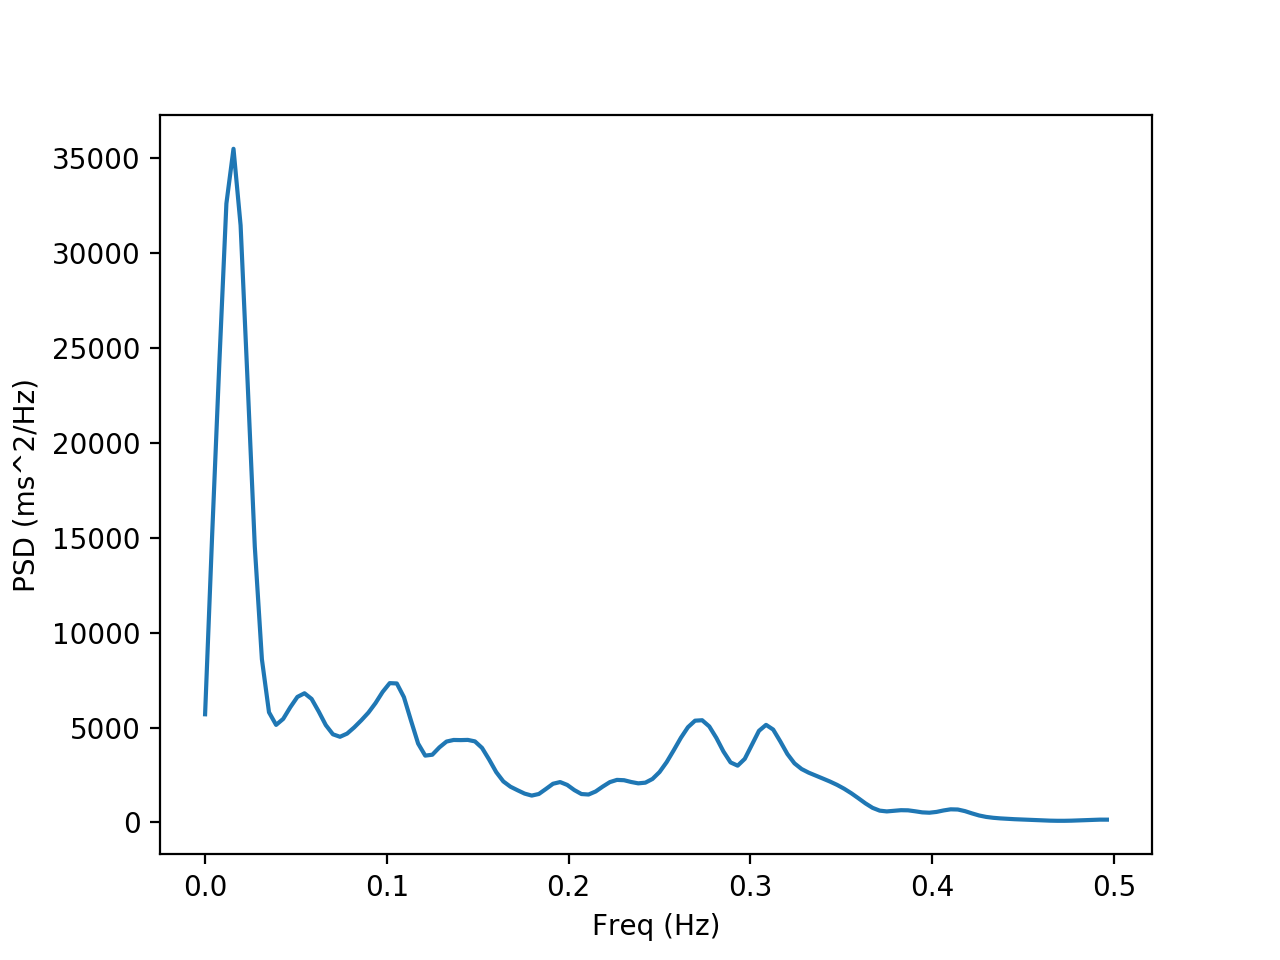

Text(0,0.5,'PSD (ms^2/Hz)')

In [11]:
#Frequency domain indices

# 1. We first re-interpolate the signal to 4Hz

rr_4hz,t_4hz = my_hrv.main_interp(rr)


# 2. PSD estimation
f,Pxx = my_hrv.main_welch(rr_4hz)

# 3. Frequency domain HRV indices

Ptot, Pulf, Pvlf, Plf, Phf, lfhf_ratio = my_hrv.spectral_indices(Pxx,f)

print("HRV Frequency Domain Analysis")

print('Ptot = {0:.2f}'.format(Ptot))
#print('Pulf = {0:.2f}'.format(Pulf)) makes no sense in 5 min recordings. 24 holte
print('Pvlf = {0:.2f}'.format(Pvlf))
print('Plf = {0:.2f}'.format(Plf))
print('Phf = {0:.2f}'.format(Phf))
print('lf/hf = {0:.2f}'.format(lfhf_ratio))

#representing PSD
plt.figure()

#get only frequencies lower than 0.5 Hz

idx_05 = f < 0.5

plt.plot(f[idx_05],Pxx[idx_05])
plt.xlabel("Freq (Hz)")
plt.ylabel("PSD (ms^2/Hz)")
